In [1]:
%matplotlib inline

This notebook explores Dirichlet Distribution(DD), which is a shape distribution, or a distribution of distributions. Sampling a dirichlet yields a multinomial distribution .


* Suppose the multinomial(categorical) distribution contains K categories. The dirichlet distribution is then parameterized by $\boldsymbol G_0$ , which is basically a mean distribution of $\boldsymbol K$ categorical variables and a scale factor, $\boldsymbol\alpha_0$

* The variance of DD is a function of scale factor $\boldsymbol \alpha_0$

* The expected value of the DD is $G_0$. When $\alpha_0$ is large, samples from $DD(\alpha , G_0)$ will be close to $G_0$.


Let's try with different values of $G_0$ and $\alpha_0$




(10000, 3)


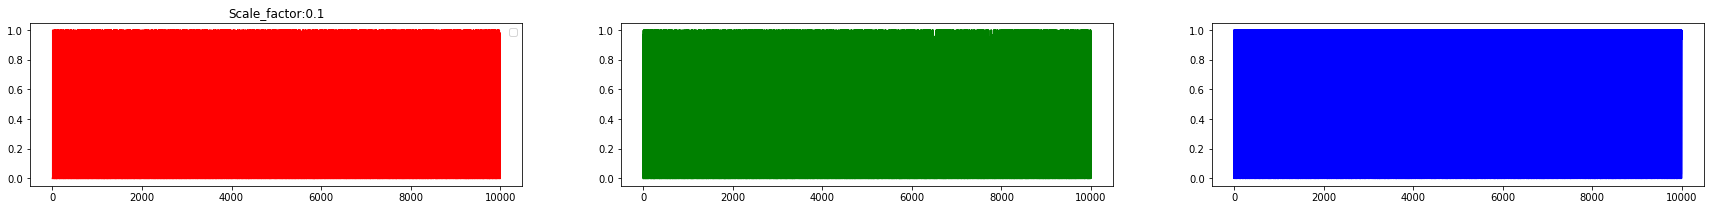

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import dirichlet

np.set_printoptions(precision=2)


def stats(scale_factor,G0=[.2,.2,.6],N=10000):
    samples = dirichlet(alpha=scale_factor*np.array(G0)).rvs(N)
    x = np.array(range(N))
    print samples.shape
    plt.figure(figsize=(30,3))
    plt.subplot(1,3,1)
    plt.title('Scale_factor:'+str(scale_factor))
    plt.legend('legend')
    plt.plot(x,samples[:,0],color='r')
    plt.subplot(1,3,2)
    plt.plot(x,samples[:,1],color='g')
    plt.subplot(1,3,3)
    plt.plot(x,samples[:,2],color='b')
#     print "                          alpha:", scale_factor
#     print "              element-wise mean:", samples.mean(axis=0)
#     print "element-wise standard deviation:", samples.std(axis=0)
#     print
    
for scale in [0.1]:#, 1, 10, 100, 1000]:
    stats(scale)
